## Imports

In [41]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

## Loading Data

In [42]:
data_path = 'data/superstore_data_imputed.csv'

df = pd.read_csv(data_path, index_col=0)

# Expanding date time to year, month

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.month

df.drop('Dt_Customer', axis=1, inplace=True)

display(df.head())

cols = df.columns

x_cols = [c for c in cols if c != 'Response']
y_col = 'Response'

print(x_cols)
print(y_col)

x = df[x_cols].values
y = df[y_col].values

x = StandardScaler().fit_transform(x)

print(f"Number of samples: {x.shape[0]}")
print(f"Number of yes responses: {np.sum(y)}")
print(f"Number of no responses: {x.shape[0] - np.sum(y)}")
print(f"Majority class percentage: {(x.shape[0]-np.sum(y)) / x.shape[0]}")

yes_idx = np.where(y == 1)[0]
no_idx = np.where(y == 0)[0]

np.random.shuffle(yes_idx)
np.random.shuffle(no_idx)

test_idx = np.concatenate((yes_idx[:50], no_idx[:50]))
train_idx = np.concatenate((yes_idx[50:], no_idx[50:]))

x_train = x[train_idx]
y_train = y[train_idx]

x_test = x[test_idx]
y_test = y[test_idx]

print(f"Number of training samples: {x_train.shape[0]}")
print(f"Number of test samples: {x_test.shape[0]}")

print(f"Number of yes in test: {np.sum(y_test)}")
print(f"Number of no in test: {x_test.shape[0] - np.sum(y_test)}")

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Missing_Income,Year,Month
Id,,,,,,,,,,,,,,,,,,,,,
1826,1970,0,0,84835.0,0,0,0,189,104,379,...,1,4,4,6,1,1,0,0,2014,6
1,1961,0,1,57091.0,0,0,0,464,5,64,...,1,7,3,7,5,1,0,0,2014,6
10476,1958,0,2,67267.0,0,1,0,134,11,59,...,1,3,2,5,2,0,0,0,2014,5
1386,1967,0,3,32474.0,1,1,0,10,0,1,...,1,1,0,2,7,0,0,0,2014,11
5371,1989,0,1,21474.0,1,0,0,6,16,24,...,2,3,1,2,7,1,0,0,2014,8


['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Missing_Income', 'Year', 'Month']
Response
Number of samples: 2240
Number of yes responses: 334
Number of no responses: 1906
Majority class percentage: 0.8508928571428571
Number of training samples: 2140
Number of test samples: 100
Number of yes in test: 50
Number of no in test: 50


## K-NN Classifier

{'n_neighbors': 9}


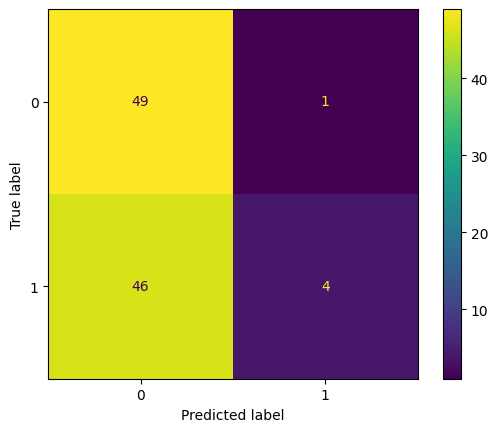

Accuracy: 0.5300, Precision: 0.8000, Recall: 0.0800, F1: 0.14545454545454545, ROC AUC: 0.5300


In [43]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100],
}

knn = KNeighborsClassifier()

gs = GridSearchCV(knn, parameters, scoring='accuracy', cv=5, n_jobs=8)

gs = gs.fit(x_train, y_train)

print(gs.best_params_)

best_knn = gs.best_estimator_

y_pred = best_knn.predict(x_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=best_knn.classes_)
disp.plot()
plt.show()

print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1}, ROC AUC: {roc_auc:.4f}")



## LDA

{'solver': 'svd'}


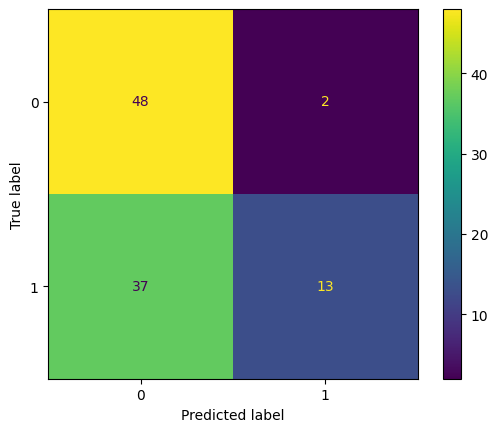

Accuracy: 0.6100, Precision: 0.8667, Recall: 0.2600, F1: 0.4, ROC AUC: 0.6100


In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

parameters = {'solver': ['svd', 'lsqr', 'eigen']}
lda = LinearDiscriminantAnalysis()

gs = GridSearchCV(lda, parameters, scoring='accuracy', cv=5, n_jobs=8)

gs = gs.fit(x_train, y_train)

print(gs.best_params_)

best_lda = gs.best_estimator_

y_pred = best_lda.predict(x_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=best_knn.classes_)
disp.plot()
plt.show()


print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1}, ROC AUC: {roc_auc:.4f}")

## QDA

{'reg_param': 0.1}


/home/codygrogan/.local/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/codygrogan/.local/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/codygrogan/.local/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/codygrogan/.local/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/codygrogan/.local/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


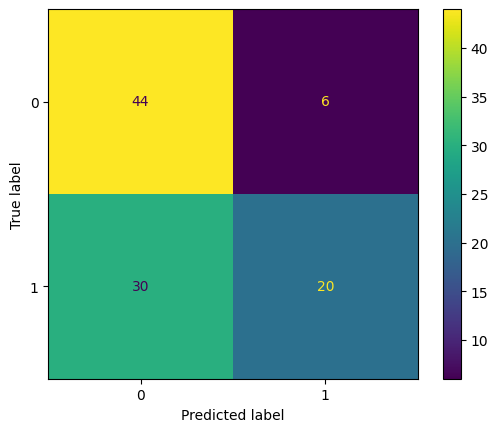

Accuracy: 0.6400, Precision: 0.7692, Recall: 0.4000, F1: 0.5263157894736842, ROC AUC: 0.6400


In [45]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

parameters = {'reg_param': [0.0, 0.001, 0.01, 0.05, 0.1]}
qda = QuadraticDiscriminantAnalysis()

gs = GridSearchCV(qda, parameters, scoring='accuracy', cv=5, n_jobs=8)

gs = gs.fit(x_train, y_train)

print(gs.best_params_)

best_qda = gs.best_estimator_

y_pred = best_qda.predict(x_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=best_knn.classes_)
disp.plot()
plt.show()

print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1}, ROC AUC: {roc_auc:.4f}")

## Logistic Regression

{'C': 1, 'penalty': 'l2'}


/home/codygrogan/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codygrogan/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codygrogan/.local/lib/python3.12/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/codygrogan/.local/lib/python3.12/site-packages/sklearn/linear_model/_logist

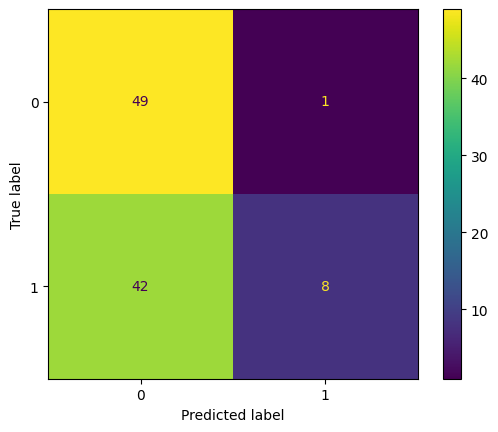

Accuracy: 0.5700, Precision: 0.8889, Recall: 0.1600, F1: 0.27118644067796616, ROC AUC: 0.5700


In [46]:
from sklearn.linear_model import LogisticRegression

parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 20, 30, 40]
}
logr = LogisticRegression(max_iter=1000)

gs = GridSearchCV(logr, parameters, scoring='accuracy', cv=5, n_jobs=8)

gs = gs.fit(x_train, y_train)

print(gs.best_params_)

best_logr = gs.best_estimator_

y_pred = best_logr.predict(x_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=best_knn.classes_)
disp.plot()
plt.show()

print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1}, ROC AUC: {roc_auc:.4f}")

## SVC

{'C': 1, 'kernel': 'rbf'}


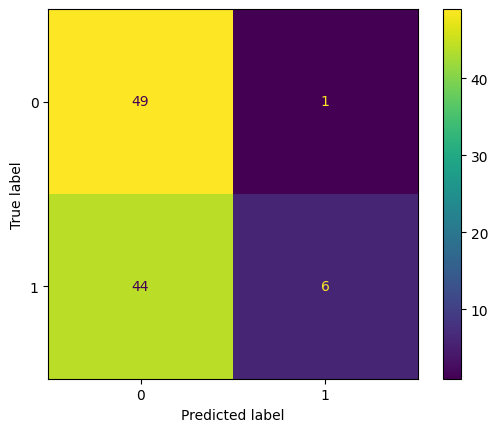

Accuracy: 0.5500, Precision: 0.8571, Recall: 0.1200, F1: 0.21052631578947367, ROC AUC: 0.5500


In [47]:
from sklearn.svm import SVC

parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf']
}
svc = SVC()

gs = GridSearchCV(svc, parameters, scoring='accuracy', cv=5, n_jobs=8)

gs = gs.fit(x_train, y_train)

print(gs.best_params_)

best_svc = gs.best_estimator_

y_pred = best_svc.predict(x_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=best_knn.classes_)
disp.plot()
plt.show()

print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1}, ROC AUC: {roc_auc:.4f}")

## Random Forests

/home/codygrogan/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
280 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
159 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codygrogan/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codygrogan/.local/lib/python3.12/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/codygrogan/.local/lib/python3.12/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "

{'max_depth': None, 'max_features': 'log2', 'n_estimators': 250}


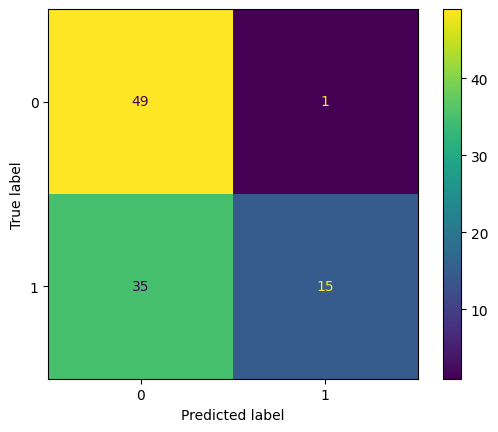

Accuracy: 0.6400, Precision: 0.9375, Recall: 0.3000, F1: 0.45454545454545453, ROC AUC: 0.6400


In [48]:
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'n_estimators': [100, 150, 200, 250, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20, 30, 40, 50],
    'max_features': ['auto', 'sqrt', 'log2']
}
rfc = RandomForestClassifier()

gs = GridSearchCV(rfc, parameters, scoring='accuracy', cv=5, n_jobs=10)

gs = gs.fit(x_train, y_train)

print(gs.best_params_)

best_rfc = gs.best_estimator_

y_pred = best_rfc.predict(x_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=best_knn.classes_)
disp.plot()
plt.show()

print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1}, ROC AUC: {roc_auc:.4f}")

## XGBoost

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300}


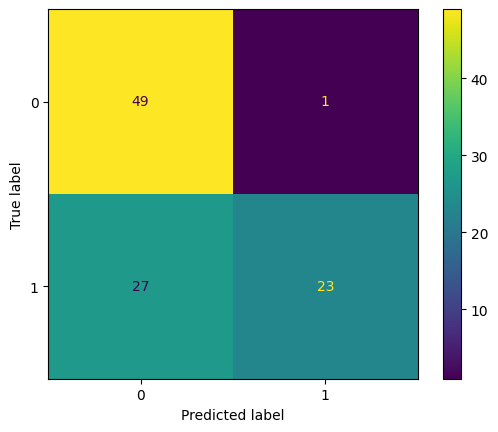

Accuracy: 0.7200, Precision: 0.9583, Recall: 0.4600, F1: 0.6216216216216216, ROC AUC: 0.7200


In [49]:
from xgboost import XGBClassifier

parameters = {
    'n_estimators': [100, 150, 200, 250, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'learning_rate': [0.001, 0.01, 0.1, 1]
}
xgc = XGBClassifier()

gs = GridSearchCV(xgc, parameters, scoring='accuracy', cv=5, n_jobs=10)

gs = gs.fit(x_train, y_train)

print(gs.best_params_)

best_xgc = gs.best_estimator_

y_pred = best_xgc.predict(x_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=best_knn.classes_)
disp.plot()
plt.show()

print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1}, ROC AUC: {roc_auc:.4f}")

## Variable Importances

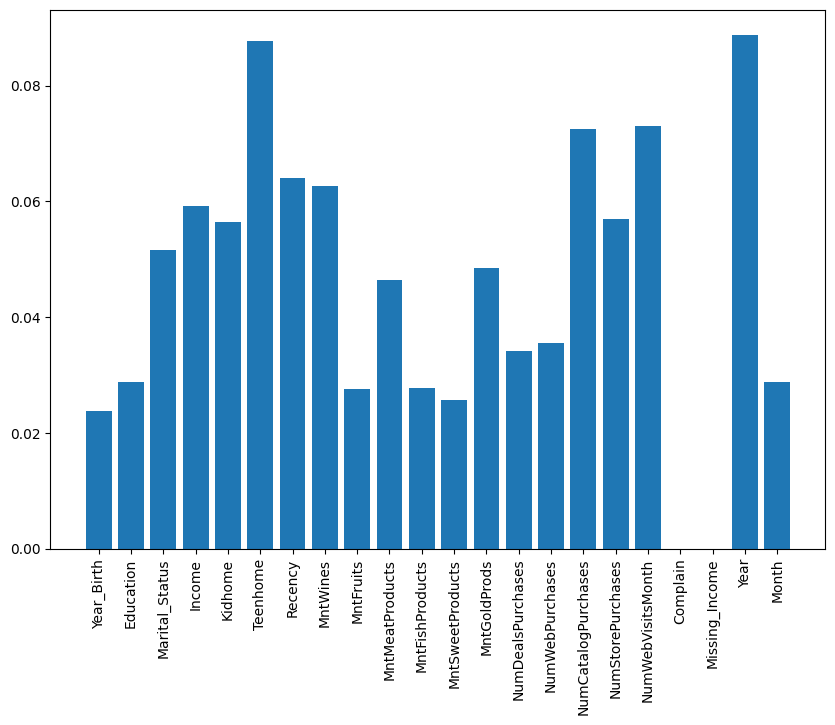

In [40]:
plt.figure(figsize=(10, 7))

x_ax = range(len(best_xgc.feature_importances_))

plt.bar(x_ax, best_xgc.feature_importances_)
plt.xticks(x_ax, x_cols, rotation=90)
plt.show()